# M.A.D. Python Libraries - `matplotlib`

<span style="color:red;">**M.A.D.** => **M**achine **L**earning and **D**ata Science<span>

**Purpose:** The purpose of this workbook is to help you get comfortable with the topics outlined below.

**Prereqs:** 
* Numpy Workbook or a good grasp of data manipulation techniques using numpy
    
**Recomended Usage**
* Run each of the cells (Shift+Enter) and edit them as necessary to solidify your understanding
* Do any of the exercises that are relevant to helping you understand the material

**Topics Covered**
* Matplotlib

# Workbook Setup

## Troubleshooting Tips

If you run into issues running any of the code in this notebook, check your version of Jupyter, extensions, etc.

```bash
!jupyter --version

jupyter core     : 4.6.1
jupyter-notebook : 6.0.2
qtconsole        : not installed
ipython          : 7.9.0
ipykernel        : 5.1.3
jupyter client   : 5.3.4
jupyter lab      : 1.2.3
nbconvert        : 5.6.1
ipywidgets       : not installed
nbformat         : 4.4.0
traitlets        : 4.3.3
```

```bash
!jupyter-labextension list

JupyterLab v1.2.3
Known labextensions:
   app dir: /usr/local/share/jupyter/lab
        @aquirdturtle/collapsible_headings v0.5.0  enabled  OK
        @jupyter-widgets/jupyterlab-manager v1.1.0  enabled  OK
        @jupyterlab/git v0.8.2  enabled  OK
        @jupyterlab/github v1.0.1  enabled  OK
        jupyterlab-flake8 v0.4.0  enabled  OK

Uninstalled core extensions:
    @jupyterlab/github
    jupyterlab-flake8
```

In [1]:
# Run this cell to check the version of Jupyter you are running
#!jupyter --version

In [2]:
# Run one of these cells to check what extensions you are using
#!jupyter-labextension list
#!jupyter-nbextension list

## Notebook Configs

In [4]:
# AUTO GENERATED CELL FOR NOTEBOOK SETUP

# NOTEBOOK WIDE MAGICS

# Reload all modules before executing a new line
%load_ext autoreload
%autoreload 2

# Abide by PEP8 code style
# %load_ext pycodestyle_magic
# %pycodestyle_on

# LIBRARY SPECIFIC MAGICS - UNCOMMENT AS NEEDED

# Plot all matplotlib plots in output cell and save on close
%matplotlib inline

In [5]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

In [1]:
# If any of the imports dont work you may need to install by running this pip cell
# !pip install matplotlib numpy

In [5]:
matplotlib.__version__

'3.1.1'

# [`matplotlib`](https://matplotlib.org/)

`matplotlib` is a plotting library.

Note that many more examples and tutorials can be found in [the docs](https://matplotlib.org/3.1.1/api/index.html)

## Plot Anatomy and Vocabulary

<table style="width:100%;font-size:18px;">
  <tr>
    <td>
        
**ARTISTS** are everything you can see on the figure (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collection objects, Patch objects, etc.

        
**FIGURES** are like canvases that can have multiple plots (called "Axes") on them.

        
The <span style="color:red;">**AXES**</span> is what matplotlib calls a plot. It's a part of that canvas on which you make a particular visualization with data (each axes has a title, x-label, y-label and data).

        
The <span style="color:red;">**AXIS**</span> are number-line-like objects that set graph limits, generate ticks, format labels, etc.

        
A **PLOT** is analogous to an AXES.

        
A **SUBPLOT** refers to one of the plots or AXES in a figure with multiple.
     </td>
    <td><img src="img/anatomy.png" width="500" height="200" align="left"></td>
  </tr>
</table>

## Matplotlib Usage Patterns

When working in matplotlib you will see two common styles. One that is less explicit where the programmer doesn't explicitly keep track of the figures and axes (matlab-style), and the other where they do (object-oriented-style). 

>**MATLAB-style is stateful so it keeps track of the current figure and axes**. It's really convenient for quick plotting so you don't have to be verbose because things are handled under the hood. You can always get a reference to the current figure and axes using `plt.gcf()` and `plt.gca()` (get current figure and get current axes respectively.

>**Object-oriented-style allows you to just explicitly assign the Figure and Axes objects** to a varaible and access them directly whenever you need to. You don't have to worry about what is active.

Let's move on to some examples.

Let's start by generating some data for us to plot.

In [6]:
# Create array of 100 vals linearly spaced b/t 0 and 5
x = np.linspace(0, 5, 100)
x

array([0.        , 0.05050505, 0.1010101 , ..., 4.8989899 , 4.94949495,
       5.        ])

**First Panel**
Current Axes: AxesSubplot(0.125,0.536818;0.775x0.343182)
Current Figure: Figure(432x288)
**Second Panel**
Current Axes: AxesSubplot(0.125,0.125;0.775x0.343182)
Current Figure: Figure(432x288)


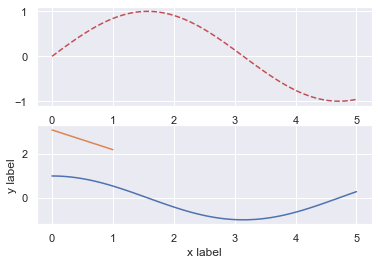

In [7]:
# Create 2 plots using MATLAB-style
plt.figure()  # Create a plot figure

# Create a subplot (1st panel) with two rows, one column;
plt.subplot(2, 1, 1)  # (rows, columns, panel number)
plt.plot(x, np.sin(x), 'r--')

print('**First Panel**')
print('Current Axes: {}'.format(plt.gca()))
print('Current Figure: {}'.format(plt.gcf()))

# Create the second panel (sets the new current axis)
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

plt.xlabel('x label')
plt.ylabel('y label')

print('**Second Panel**')
ax = plt.gca()
fig = plt.gcf()
ax.plot([3.1, 2.2])  # Will be plotted on the current "active" axes
print('Current Axes: {}'.format(ax))
print('Current Figure: {}'.format(fig))

You can see we assigned axis labels to the second panel however once we've passed it there is no way to go back to the first panel to modify it without re-running the whole thing.

Instead, using the object-oriented style (below) we can just assign the axes (panels/plots) to a variable that we can reference later.

fig: Figure(432x288)
ax (an array of axis objects): [<matplotlib.axes._subplots.AxesSubplot object at 0x1208a6c90>


[Text(0, 0.5, 'y label'),
 Text(0.5, 0, 'x label'),
 Text(0.5, 1.0, 'Plot 1 Title')]

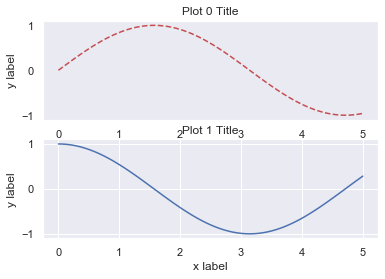

In [9]:
# Create 2 plots using object-oriented-style

# Create a grid of plots
fig, ax = plt.subplots(2)

print('fig: {}'.format(fig))
print('ax (an array of axis objects): {}'.format(ax))

# Call plot() method on the specific axes object you want
ax[0].plot(x, np.sin(x), 'r--')
ax[1].plot(x, np.cos(x))

# Now we can reference the first plot to change/update it
ax[0].set(xlabel='x label', ylabel='y label', title='Plot 0 Title')
ax[0].grid()

# OR we can reference the second plot to change/update it
ax[1].set(xlabel='x label', ylabel='y label', title='Plot 1 Title')

Notice this method is more verbose but also very explicit about what it is doing.

*Note: `set()` is a really useful function that allows you to set multiple properties at once for an Artist.*

In [25]:
matplotlib.artist.Artist.set?

Signature: matplotlib.artist.Artist.set(self, **kwargs)
Docstring: A property batch setter.  Pass *kwargs* to set properties.
File:      /usr/local/lib/python3.7/site-packages/matplotlib/artist.py
Type:      function


## Basic 2D Plots

Use the `pyplot` module in Matplotlib to create basic plots.

### Draw a figure with one axes and three functions

Generate the data:

In [10]:
x = np.linspace(0, 5, 100)
len(x)

100

In [11]:
# Linear Function (f(x) = y = x)
x1 = x
y1 = x1

In [12]:
# Quadratic Function (f(x) = y = x^2)
x2 = x
y2 = x**2

In [13]:
# Cubic Function (f(x) = y = x^3)
x3 = x
y3 = x**3

Plot the figure:

Current Axes: AxesSubplot(0.125,0.125;0.775x0.755)
Current Figure: Figure(432x288)


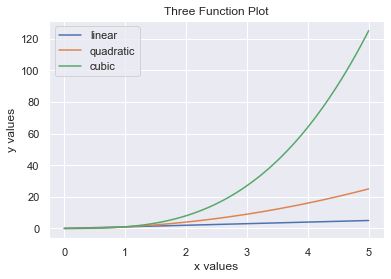

In [14]:
# A figure with one axes and three functions (MATLAB-style)
plt.plot(x1, y1, label='linear')
plt.plot(x2, y2, label='quadratic')
plt.plot(x3, y3, label='cubic')

plt.xlabel('x values')
plt.ylabel('y values')

plt.title("Three Function Plot")

plt.legend()

print('Current Axes: {}'.format(plt.gca()))
print('Current Figure: {}'.format(plt.gcf()))

An even shorter solution might look like what is below but then again, its far less readble

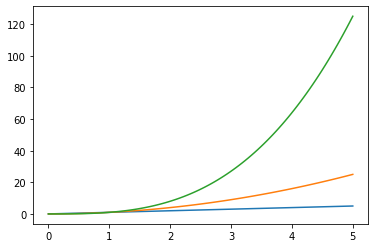

In [56]:
plt.plot(x1, y1, x2, y2, x3, y3)

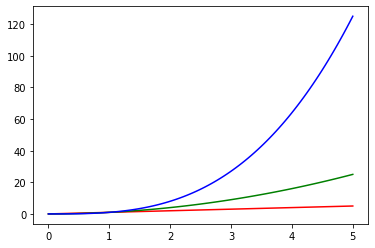

In [65]:
plt.plot(x1, y1, 'r', x2, y2, 'g', x3, y3, 'b')

### Draw a figure with two stacked axes

Let's plot sin(x) on the top and cos(x) on the bottom:

Text(0.5, 1.0, 'cos(x)')

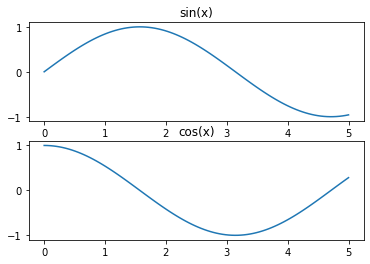

In [48]:
# Object-oriented style seems like overkill here so I just keep it short and sweet using MATLAB-style
plt.figure()

plt.subplot(2, 1, 1) # nrows, ncols, index
plt.plot(x, np.sin(x), label='sin')
plt.title('sin(x)')

plt.subplot(2, 1, 2) # nrows, ncols, index
plt.plot(x, np.cos(x), label='cos')
plt.title('cos(x)')

### Plot a scatter plot

Let's generate some data that we can plot on a scatter plot

In [104]:
x = [1, 2, 3, 4]
y = [2, 4, 6, 10]

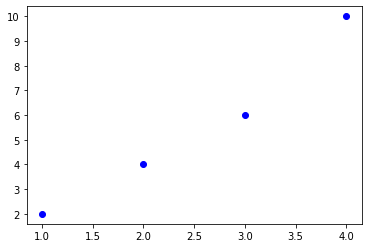

In [74]:
plt.plot(x, y, 'bo') # the 'bo' is short for blue dot

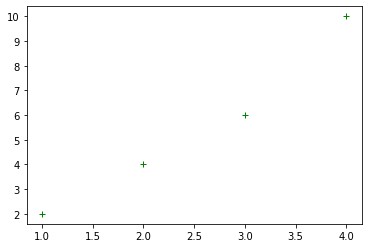

In [70]:
plt.plot(x, y, 'g+') # the 'g+' is short for green +

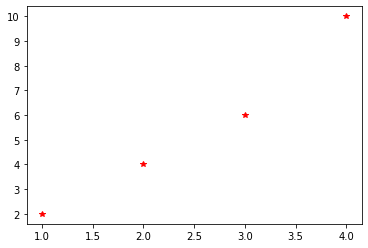

In [69]:
plt.plot(x, y, 'r*') # the 'r*' is short for red *

We could also have used `plt.scatter`

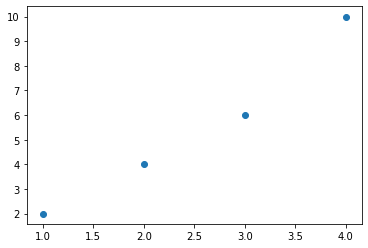

In [75]:
plt.scatter(x, y)

### Scatter plot with more than two variables

Use the data variable defined below to plot a scatter plot with 4 variables.

In [97]:
data = {'a': np.arange(20),
        'c': np.random.randint(0, 20, 20), # from 0-20 as a 1x20 array
        'd': np.random.randn(20)} # 20 random numbers

data['b'] = data['a'] + 10*np.random.randn(20) # linear with some offset
data['d'] = np.abs(data['d']) * 100

data

{'a': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 'c': array([10, 15,  3, 16,  2,  4,  3, 14, 15, 14, 17,  3,  2, 17,  8, 14, 11,
        16,  2,  9]),
 'd': array([170.46232303, 129.58406701, 104.50894663,  73.20381738,
         85.62821192,  41.99816178,  16.67690522, 120.4125626 ,
        207.03858614,  14.73990397,   2.91009916,  91.05790791,
         64.12211341,  55.21968868,  80.19092726,  91.33610884,
         37.00475259, 115.86816323,  98.609294  ,  16.57956607]),
 'b': array([-9.18640452, 11.68568609,  3.05645115,  2.30152261, 13.76448889,
        -0.11684857,  9.47730192,  6.42394967,  4.02944518, 24.95710932,
        11.30372753, -0.16844503,  8.48774479, 20.57792785, 28.70355728,
         8.16623315, 15.86644793, 10.68775741, 15.77104704, 10.03200524])}

We can use `a` and `b` as `x` and `y` variables then size and color for `c` and `d` variables.

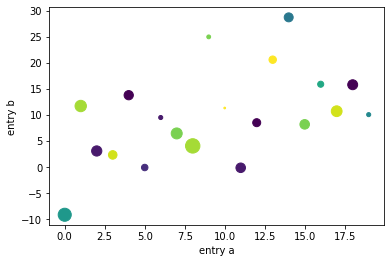

In [98]:
plt.scatter('a', 'b', c='c', s='d', data=data) # use label 'c' for color and label 'd' for size
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Create three plots in a row using the data below

Use this data

In [99]:
x = ['tammy', 'ernam', 'markeit']
y = [36, 32, 28]

Plot the figure

<BarContainer object of 3 artists>

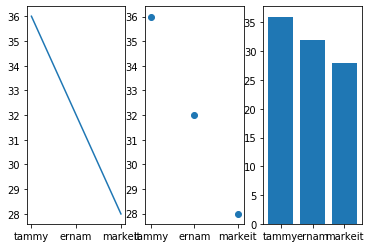

In [103]:
plt.figure()

nrows, ncols = 1, 3

plt.subplot(nrows, ncols, 1)
plt.plot(x, y)

plt.subplot(nrows, ncols, 2)
plt.scatter(x, y)

plt.subplot(nrows, ncols, 3)
plt.bar(x, y)

## More 2D Plots

*Note: If you understand the "Draw Basic Plots" section, you understand enough to reference the docs and be able to do any of the other cool plots they support. Everything below is optional but perhaps good to run through. I will give examples of plots that I find most useful.*

### Histogram of randomly selected numbers

Generate data: 5000 random integers be 0 and 100

In [29]:
x = np.random.randint(0, 100, size=5000)

Plot a histogram of the data `x` put into 50 bins with a bar color of green and alpha/transparency of .75.

Text(0.5, 1.0, 'Histogram Randomly Selected Numbers')

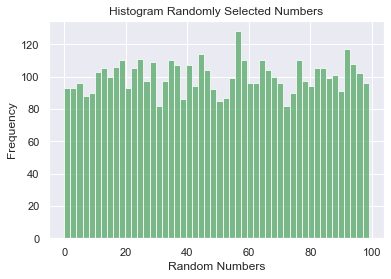

In [32]:
n, bins, patches = plt.hist(x, 50, facecolor='g', alpha=0.75)

plt.xlabel('Random Numbers')
plt.ylabel('Frequency')
plt.title('Histogram Randomly Selected Numbers')

### Plot an image

An image is just array of pixels length by width with each pixel having three color channels (R, G, and B)

In [8]:
import matplotlib.image as mpimg  # import matplotlib image module

Load an image file then use `imshow` to display it.

Image Shape: (681, 1024, 3)
[[0.3647059  0.34117648 0.1254902 ]
 [0.3764706  0.34509805 0.1254902 ]
 [0.39215687 0.36078432 0.13725491]
 ...
 [0.22352941 0.21176471 0.05882353]
 [0.21960784 0.20392157 0.04705882]
 [0.21568628 0.2        0.04313726]]


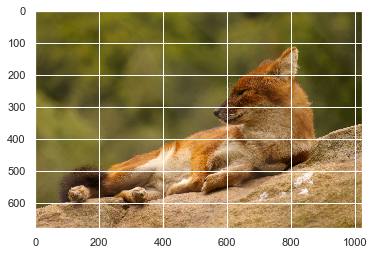

In [21]:
img_fox = mpimg.imread('img/fox.png')
print('Image Shape: {}'.format(img_fox.shape))
# print(img)  # Uncomment to see the image as an array

print(img_fox[0])
plt.imshow(img_fox)

#### A Deeper Understanding of Images as Arrays

An image array can be plotted like we did above because an image is just an array of pixels which each have 3 values. Therefore an image is an array with dimensions **length by width by 3 (R, G, and B)**

Let's generate a randomly colored RGB image with one whole row for each of the three R, G, B color channels.

(10, 10, 3)


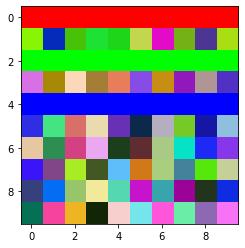

In [8]:
img_size = 10

img = np.random.random((img_size, img_size, 3))

img[0, :, :] = [1, 0, 0]  # RED row
img[2, :, :] = [0, 1, 0]  # GREEN row
img[4, :, :] = [0, 0, 1]  # BLUE row

print(img.shape)

plt.imshow(img)

To inspect how each color channel in the array contributes to the final image, we can select the the RED channel and zero out the other channels. This will allow us to see how much red is contributing to the overall color mixture.

In [10]:
img_red = np.copy(img)
img_red[..., 1:3] = 0  # Zero out the non-red channels

Similarly we can do the same to select just the green channels and just the blue channels

In [11]:
img_green = np.copy(img)
img_green[..., 0] = 0  # Zero out the non-green channels
img_green[..., 2] = 0

In [12]:
img_blue = np.copy(img)
img_blue[..., 0:2] = 0  # Zero out the non-blue channels

Now lets plot the original image next to the images with each of the colors broken down.

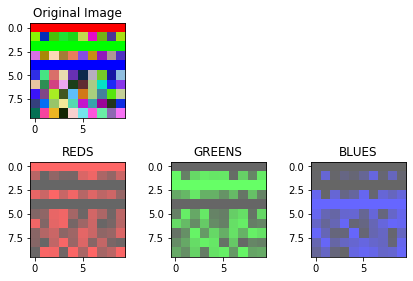

In [14]:
nrows = 2
ncols = 3

fig = plt.figure()

ax1 = fig.add_subplot(nrows, ncols, 1)
ax1.set(title='Original Image')
plt.imshow(img)

ax3 = fig.add_subplot(nrows, ncols, 4)
ax3.set(title='REDS')
plt.imshow(img_red, alpha=.6)

ax4 = fig.add_subplot(nrows, ncols, 5)
ax4.set(title='GREENS')
plt.imshow(img_green, alpha=.6)

ax5 = fig.add_subplot(nrows, ncols, 6)
ax5.set(title='BLUES')
plt.imshow(img_blue, alpha=.6)

plt.tight_layout()  # Space subplots so they are all visible

We can see that where the RED line is on the original image, only the RED color is contributing (green and blue is black). Similarly where the GREEN line is on the original image, only the GREEN color is contributing. Same for the blue line.

If we take a look at the fox image again from above we can play with some of its colors.

In [22]:
# Remove all but one color dimension (the 0th color dim is selected here)
img_fox_2d = img_fox[:, :, 0]
print('Image Shape: {}'.format(img_fox_2d.shape))
print(img_fox_2d)

Image Shape: (681, 1024)
[[0.3647059  0.3764706  0.39215687 ... 0.22352941 0.21960784 0.21568628]
 [0.36862746 0.38431373 0.39607844 ... 0.21960784 0.22352941 0.22352941]
 [0.37254903 0.3764706  0.38039216 ... 0.22352941 0.22352941 0.22745098]
 ...
 [0.654902   0.6666667  0.65882355 ... 0.54509807 0.56078434 0.5764706 ]
 [0.7137255  0.7254902  0.72156864 ... 0.54509807 0.5764706  0.59607846]
 [0.7647059  0.75686276 0.7529412  ... 0.54509807 0.57254905 0.5764706 ]]


*Note: We could have done this using any of the three channels for example `img_fox_2d = img_fox[:, :, 1]` or `img_fox_2d = img_fox[:, :, 2]`. Try it below and compare to the original array to make sure you understand what is being selected.*

Now when we look at the image using some existing colormaps and get some cool renderings.

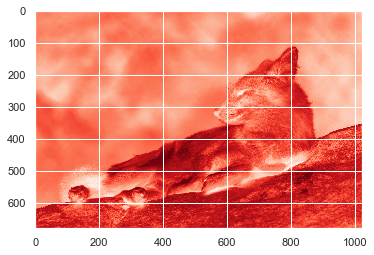

In [23]:
plt.imshow(img_fox_2d, cmap="Reds")  # Try other cmaps like "Blues", "Greens"

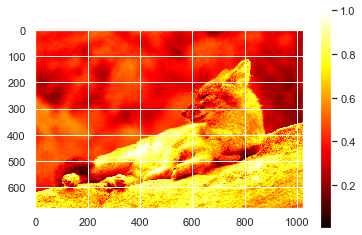

In [24]:
plt.imshow(img_fox_2d, cmap="hot")
plt.colorbar()  # You can also plot a color bar if you want

### Contour Maps

Contour maps can be useful for showing density of things or elevations.

Let's generate some data to plot.

In [83]:
x = np.linspace(0, 5, 50)
print(x.shape)
print(x)

(50,)
[0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]


In [87]:
X, Y = np.meshgrid(x, x)
print(X)
print(Y)

[[0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 ...
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]
 [0.         0.10204082 0.20408163 ... 4.79591837 4.89795918 5.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.10204082 0.10204082 0.10204082 ... 0.10204082 0.10204082 0.10204082]
 [0.20408163 0.20408163 0.20408163 ... 0.20408163 0.20408163 0.20408163]
 ...
 [4.79591837 4.79591837 4.79591837 ... 4.79591837 4.79591837 4.79591837]
 [4.89795918 4.89795918 4.89795918 ... 4.89795918 4.89795918 4.89795918]
 [5.         5.         5.         ... 5.         5.         5.        ]]


In [88]:
def generate_contour_data(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [89]:
data = generate_contour_data(X, Y)
print(data.shape)
print(data)

(50, 50)
[[-0.83907153 -0.83470697 -0.8216586  ...  0.8956708   0.68617261
   0.41940746]
 [-0.83907153 -0.82902677 -0.8103873  ...  0.92522407  0.75321348
   0.52508175]
 [-0.83907153 -0.82325668 -0.79876457 ...  0.96427357  0.84172689
   0.66446403]
 ...
 [-0.83907153 -0.48233077 -0.01646558 ...  0.96449925  0.75196531
   0.41982581]
 [-0.83907153 -0.47324558  0.00392612 ...  0.92542163  0.68540362
   0.37440839]
 [-0.83907153 -0.46410908  0.02431613 ...  0.89579384  0.65690314
   0.40107702]]


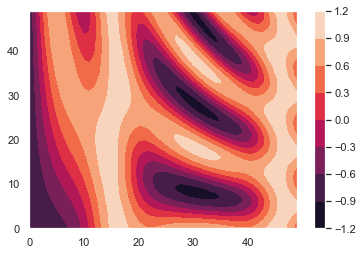

In [90]:
plt.contourf(data)
plt.colorbar()

### Make an XKCD graphic (non-useful fun)

Matplotlib supports some fun stuff like xkcd style graphs too :D

In [197]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])

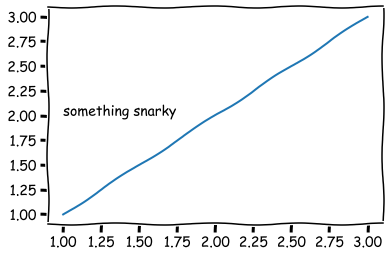

In [201]:
with plt.xkcd():
    fig = plt.figure()
    plt.plot(x, y)
    plt.annotate("something snarky", (1,2))

### Change over time 

Being able to plot things with a time variable/component is really useful and good to know how to do. Depending on the application you may want to use some type of spreadsheet graphing application which will typically have lots of built in formatting options for dates/times. 

In matplotlib however we can use the import `matplotlib.dates` module

In [91]:
import matplotlib.dates as mdates

Start by creating the data we want to plot

In [147]:
datetimes = np.arange(np.datetime64('2019-01-01'), np.datetime64('2020-01-01'))
print(datetimes.shape)
print(datetimes)

(365,)
['2019-01-01' '2019-01-02' '2019-01-03' ... '2019-12-29' '2019-12-30'
 '2019-12-31']


In [151]:
vals = np.random.random(len(datetimes))
print(vals.shape)
print(vals)

(365,)
[0.4303916  0.55340187 0.87719335 ... 0.14519308 0.3660962  0.79187163]


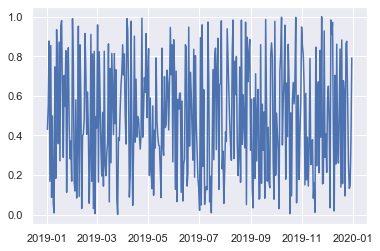

In [153]:
plt.plot(datetimes, vals)

# TODO use mdates to show functionality

### Streamplot

A simple streamplot. Find more examples in the docs: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/plot_streamplot.html

First, lets create the data for a streamplot. We are going to need an evenly spaced grid of points (X and Y). Then we will need the velocities (which we will call U, V) for each direction X and Y respectively.

In [58]:
# Create an evenly spaced 1D grid of points for X and Y
size = 3
Y, X = np.mgrid[-size:size:100j, -size:size:100j]  # Create a meshgrid from -w to w of 100 numbers
print('X shape: {}\nY shape: {}'.format(X.shape, Y.shape))

X shape: (100, 100)
Y shape: (100, 100)


In [77]:
U = (X+Y)**2
V = Y**2
print('U shape: {}\nV shape: {}'.format(U.shape, V.shape))

U shape: (100, 100)
V shape: (100, 100)


Text(0.5, 1.0, 'A Simple Varying Color Streamplot')

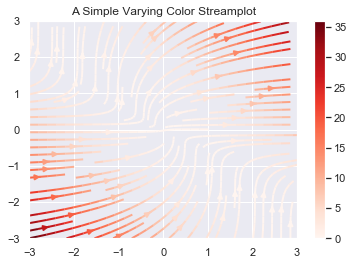

In [78]:
plt.streamplot(X, Y, U, V, color=U, linewidth=2, cmap='Reds')
plt.colorbar()
plt.title('A Simple Varying Color Streamplot')

## 3D Plots

Matplotlib comes with a 3D toolkit that can be useful. Take a look at some common 3D plots below.

In [18]:
from mpl_toolkits.mplot3d import Axes3D

### 3D Line Plots

3D line plots are very similar to the 2D version we already learned.

Generate data for a spiral (circle in the x, y with incrementing z)

In [191]:
theta = np.linspace(0, 8 * np.pi, 100)
z = np.linspace(0, 1, 100)
x = z * np.sin(theta)
y = z * np.cos(theta)

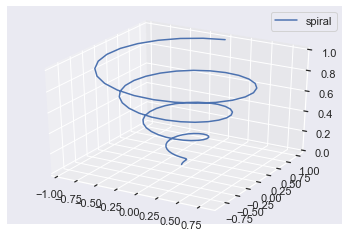

In [192]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x, y, z, label='spiral')
ax.legend()

### 3D Scatter Plots

Generate some 3D linear data with a slight random offset.

In [19]:
npoints = 200
zlow = 0
zhigh = 30
x = np.random.randint(23, 32, size=npoints)
y = np.random.randint(0, 100, size=npoints)
z = np.random.randint(zlow, zhigh, size=npoints)

[Text(0.5, 0, 'z vals'), Text(0.5, 0, 'y vals'), Text(0.5, 0, 'x vals')]

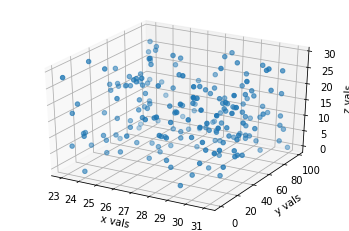

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)
ax.set(xlabel='x vals', ylabel='y vals', zlabel='z vals')

To give each axis different symbols we can use a loop like this

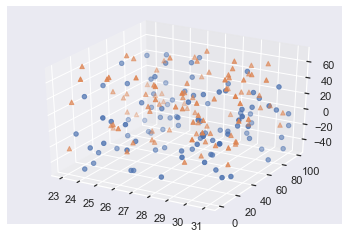

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

npoints = 100

for mkr, zlow, zhigh in [('o', -50, 50), ('^', -30, 70)]:
    x = np.random.randint(23, 32, size=npoints)
    y = np.random.randint(0, 100, size=npoints)
    z = np.random.randint(zlow, zhigh, size=npoints)
    ax.scatter(x, y, z, marker=mkr)

### 3D Surface Plots

Check out this link for many more examples: https://matplotlib.org/3.1.0/gallery/index.html#mplot3d-examples-index

In [222]:
X = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, X)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

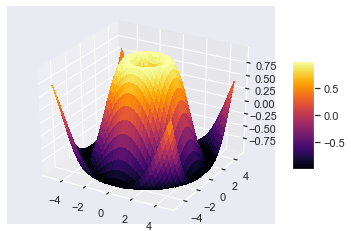

In [230]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X, Y, Z, cmap=matplotlib.cm.inferno,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

# Defining Custom Plotting Functions

Another really useful thing you will likely find yourself needing to do at some point is writing a custom function to plot similar data.

Let's say I am plotting vectors and rather than having to redraw quiver plots each time I want to just be able to pass my vecotrs to a function and have them plotted prettily.

Let's define a custom plotting function for this.

In [102]:
def vectorplot_2d(vectors=None, labels=None, colors=None, title=None):
    '''A custom vector plotting function that makes it easy to plot 2D vectors'''

    # TODO ADD KWARGS THAT CAN BE PASSED INTO THE SET FUNCTION

    # TODO input data checks
    # type(vectors) -> list of int tuple
    # type(vector_labels) -> list of strings
    # len(vectors) == len(vector_labels)
    # title == None | string

    fig, ax = plt.subplots(1)

    origin = [0], [0]
    xmin, xmax = 0, 0
    ymin, ymax = 0, 0

    if colors == None:
        color_list = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
        colors = np.random.choice(color_list, len(vectors))

    if labels == None:
        labels = ['V'+str(i) for i in range(len(vectors))]

    for i in range(len(vectors)):
        ax.quiver(*origin, *vectors[i], color=colors[i], label=labels[i], units='xy', scale=1)

        if vectors[i][0] < xmin:
            xmin = vectors[i][0]
        elif vectors[i][0] > xmax:
            xmax = vectors[i][0]

        if vectors[i][1] < ymin:
            ymin = vectors[i][1]
        elif vectors[i][1] > ymax:
            ymax = vectors[i][1]

    buffer = 2
    plt.xlim(xmin - buffer, xmax + buffer)
    plt.ylim(ymin - buffer, ymax + buffer)

    plt.grid()

    if title != None:
        plt.title(title)

    plt.legend()

Then we can test the function we wrote.

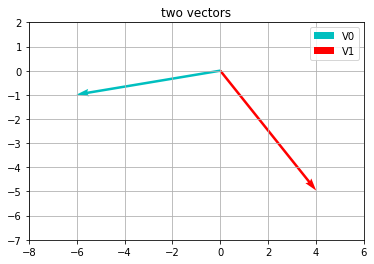

In [103]:
# Test 2 vectors
vectorplot_2d([(-6, -1), (4, -5)], title='two vectors')

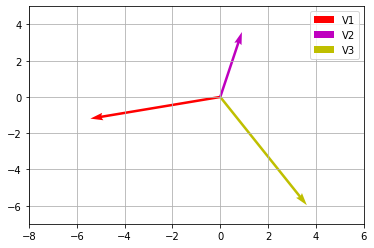

In [106]:
# Test 3 vectors
vectorplot_2d([(-6, -1), (1, 3), (4, -5)], labels=['V1', 'V2', 'V3'])

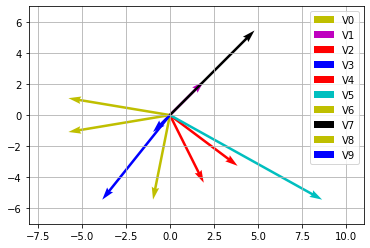

In [107]:
# Test 10 vectors
vectorplot_2d([(-6, 1), (2, 2), (4, -3), (-1, -1), (2, -4), (9, -5), (-6, -1), (5, 5), (-1, -5), (-4, -5)])

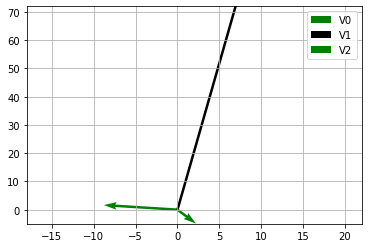

In [108]:
# Test very large vectors
vectorplot_2d([(-16, 1), (20, 70), (4, -3)])